# Libaries

In [1]:
# Data-handling libraries
import pandas as pd

# Text-handling libaries
from nltk.corpus import stopwords

# Reshaping imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Modeling imports
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Other imports
import matplotlib.pyplot as plt

# Options
seed = 5777

# Model data

## Import data

In [2]:
# Don't "intelligently" (in BIG scare quotes) filter out NA values
# or else we end up dropping naan bread (spelled "nan"). :facepalm:
df = pd.read_csv("data/Dishes-by-year.csv.bz2", na_filter=False)

## Split data

In [3]:
X = df["name"]
y = df["decade"]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed)

## Define baseline

In [4]:
# Baseline probability allocation
y.value_counts(normalize=True)

1900    0.316122
1910    0.298786
1930    0.096658
1950    0.064290
1940    0.058035
1960    0.049328
1890    0.044186
1970    0.019835
1920    0.017144
1980    0.016135
1880    0.010011
1990    0.003024
1860    0.002271
1850    0.001762
2000    0.001164
2010    0.001112
1870    0.000137
Name: decade, dtype: float64

## Options for all models

In [5]:
cv_folds = 3
verbosity = 3

tfidf = TfidfVectorizer(
                stop_words = "english",
                strip_accents = "ascii"
            )

## Naïve Bayes classifier

In [6]:
pipe1 = Pipeline([
        ("tfidf", tfidf),
        ("mbayes", MultinomialNB())
    ])

grid1 = GridSearchCV(pipe1, {
    "tfidf__max_features": [5_000, 10_000, 50_000],
}, cv=cv_folds, verbose=verbosity)

In [8]:
grid1.fit(X_train, y_train)
print(grid1.best_score_, "with", grid1.best_params_)
print("Test:", grid1.score(X_test, y_test))

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] tfidf__max_features=5000 ........................................
[CV]  tfidf__max_features=5000, score=0.4438546178709076, total=  14.9s
[CV] tfidf__max_features=5000 ........................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV]  tfidf__max_features=5000, score=0.44284736051866136, total=  13.5s
[CV] tfidf__max_features=5000 ........................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   48.9s remaining:    0.0s


[CV]  tfidf__max_features=5000, score=0.44385599542643184, total=  11.3s
[CV] tfidf__max_features=10000 .......................................
[CV]  tfidf__max_features=10000, score=0.45199317755629614, total=  13.3s
[CV] tfidf__max_features=10000 .......................................
[CV]  tfidf__max_features=10000, score=0.4509263156572161, total=  12.9s
[CV] tfidf__max_features=10000 .......................................
[CV]  tfidf__max_features=10000, score=0.45201051669383796, total=  11.6s
[CV] tfidf__max_features=50000 .......................................
[CV]  tfidf__max_features=50000, score=0.45217221958719817, total=  11.7s
[CV] tfidf__max_features=50000 .......................................
[CV]  tfidf__max_features=50000, score=0.45018815295987535, total=  12.5s
[CV] tfidf__max_features=50000 .......................................
[CV]  tfidf__max_features=50000, score=0.4509833485680899, total=  13.3s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.2min finished


0.451643335044 with {'tfidf__max_features': 10000}
Test: 0.455237359317


## Decision tree classifier

In [13]:
pipe2 = Pipeline([
        ("tfidf", tfidf),
        ("tree", DecisionTreeClassifier())
    ])

grid2 = GridSearchCV(pipe2, {
    "tfidf__max_features": [10_000, 50_000],
    "tree__max_depth": [10, 20],
    "tree__min_samples_split": [10],
}, cv=cv_folds, verbose=verbosity)

In [14]:
grid2.fit(X_train, y_train)
print(grid2.best_score_, "with", grid2.best_params_)
print("Test:", grid2.score(X_test, y_test))

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10 
[CV]  tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10, score=0.3478127031891469, total=  23.3s
[CV] tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   31.7s remaining:    0.0s


[CV]  tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10, score=0.34801073005861327, total=  26.5s
[CV] tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  tfidf__max_features=10000, tree__max_depth=10, tree__min_samples_split=10, score=0.34798068798276116, total=  24.6s
[CV] tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10 
[CV]  tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10, score=0.35943472975647145, total=  48.9s
[CV] tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10 
[CV]  tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10, score=0.3616745927540693, total=  34.7s
[CV] tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10 
[CV]  tfidf__max_features=10000, tree__max_depth=20, tree__min_samples_split=10, score=0.3599423278079855, total=  30.5s
[CV] tfidf__max_features=50000, tree__max_depth=10, tree__min_samples_split=10 
[CV]  tfidf__max_features=50000, tree__max_depth=10, tree__min_samples_split=10, score=0.34807655460310777, total=  18.1s
[CV] tfidf__max_features=50000, tree__max_depth=10, tree__min_samples_sp

[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  7.2min finished


0.360692933502 with {'tfidf__max_features': 50000, 'tree__max_depth': 20, 'tree__min_samples_split': 10}
Test: 0.360485241411


## Random forest classifier

In [25]:
pipe3 = Pipeline([
        ("tfidf", tfidf),
        ("rf", RandomForestClassifier())
    ])

grid3 = GridSearchCV(pipe3, {
    "tfidf__max_features": [10_000, 50_000],
    "rf__n_estimators": [5],
    "rf__max_depth": [20],
    "rf__min_samples_split": [10],
}, cv=cv_folds, verbose=verbosity)

In [26]:
grid3.fit(X_train, y_train)
print(grid3.best_score_, "with", grid3.best_params_)
print("Test:", grid3.score(X_test, y_test))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000 
[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000, score=0.35567798819579033, total=  25.1s
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   35.6s remaining:    0.0s


[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000, score=0.34964725246420697, total=  26.5s
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=10000, score=0.35203281912103307, total=  24.1s
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000 
[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000, score=0.33989401968205907, total=  25.6s
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000 
[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000, score=0.3359080029400863, total=  23.8s
[CV] rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000 
[CV]  rf__max_depth=20, rf__min_samples_split=10, rf__n_estimators=5, tfidf__max_features=50000, score=0.34393169803141815, total=  25.2s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.6min finished


0.352452699802 with {'rf__max_depth': 20, 'rf__min_samples_split': 10, 'rf__n_estimators': 5, 'tfidf__max_features': 10000}
Test: 0.348765693859


# Evaluate models

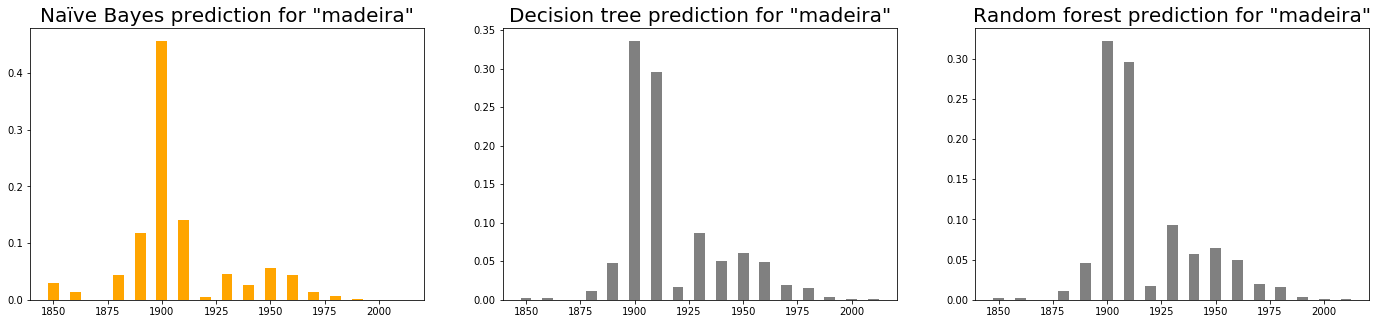

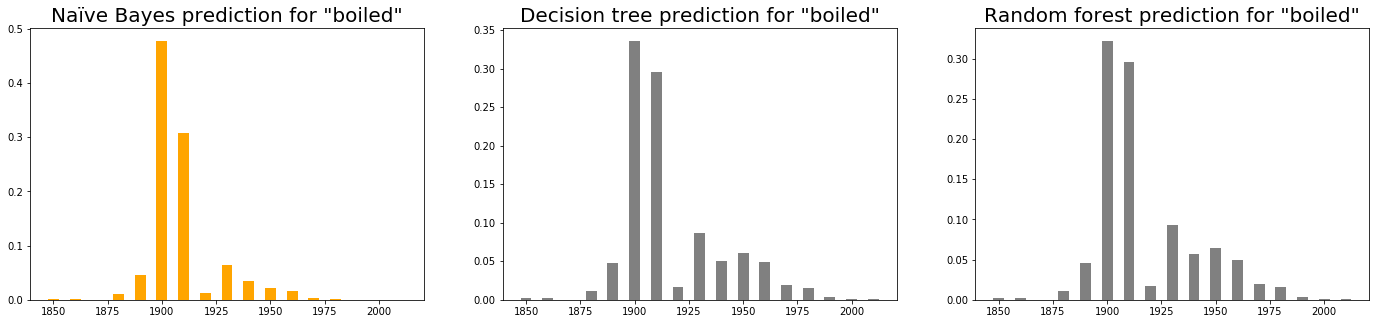

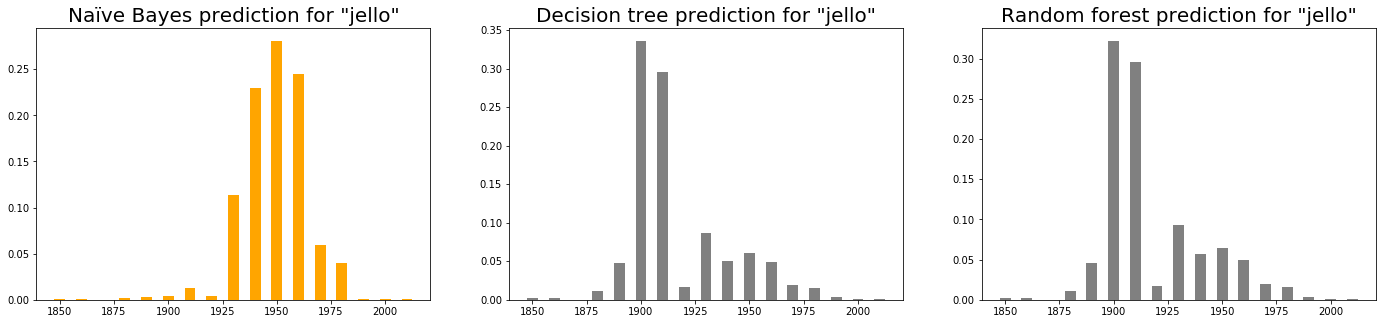

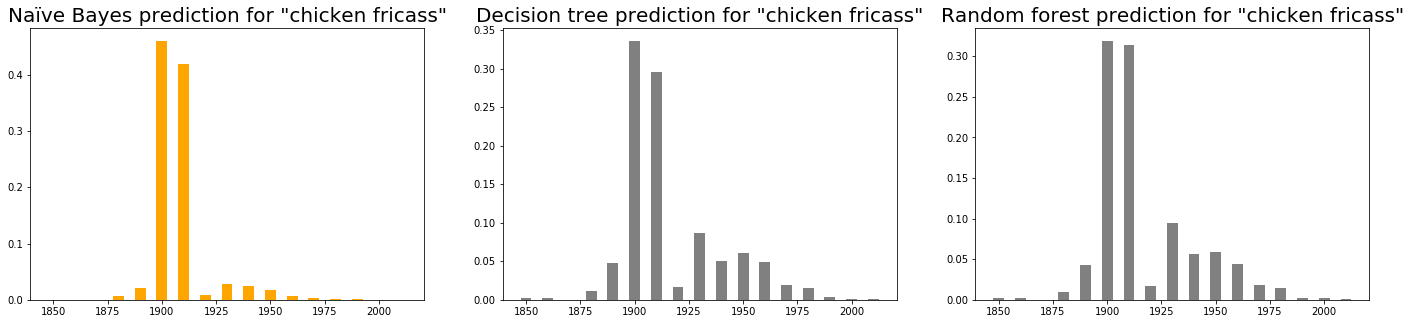

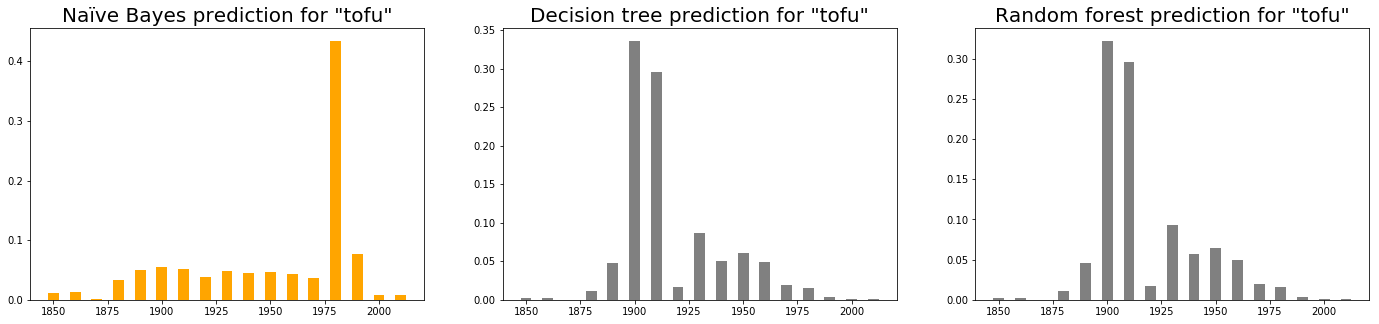

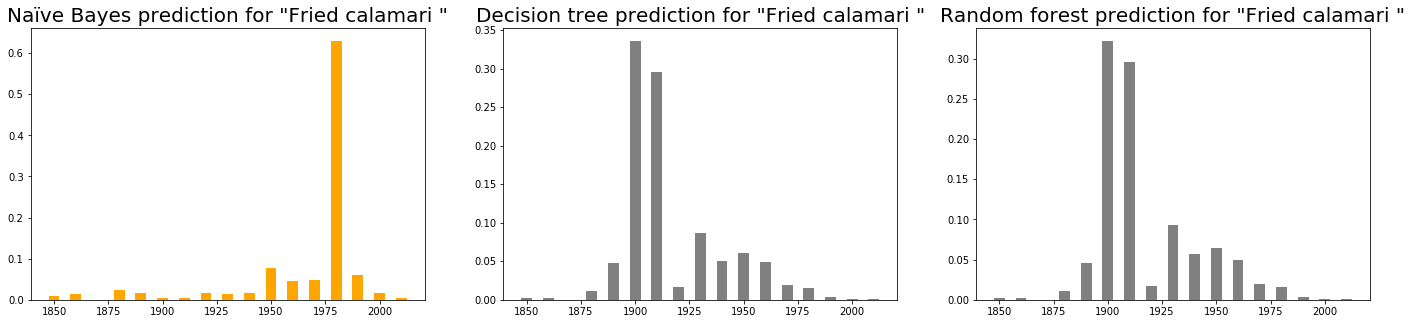

In [42]:
def predict_decade(term):
    fig, ax = plt.subplots(1, 3, figsize=(24, 5))
    for name, model, color, axis in zip(
        ["Naïve Bayes", "Decision tree", "Random forest"],
        [grid1, grid2, grid3],
        ["orange", "gray", "gray"],
        ax.ravel()):

        axis.set_title(f"{name} prediction for \"{term[:15]}\"", fontsize=20)
        axis.bar(
           list(range(1850, 2020, 10)),
           model.predict_proba([term])[0],
           width=5,
           color=color
        );

predict_decade("madeira")
predict_decade("boiled")
predict_decade("jello")
predict_decade("chicken fricassee")
predict_decade("tofu")
predict_decade("Fried calamari with house pepperoncini in a tangy dipping sauce")